In [56]:
import pandas as pd

# Load Excel file
xls = pd.ExcelFile('CTG.xls')
print(xls.sheet_names)

# Load the relevant sheet
df = xls.parse('Raw Data')
df.head()

['Description', 'Data', 'Raw Data']


,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Variab10.txt,1996-12-01,CTG0001.txt,240.0,357.0,120.0,120.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
2,Fmcs_1.txt,1996-05-03,CTG0002.txt,5.0,632.0,132.0,132.0,4.0,0.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,Fmcs_1.txt,1996-05-03,CTG0003.txt,177.0,779.0,133.0,133.0,2.0,0.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,Fmcs_1.txt,1996-05-03,CTG0004.txt,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0


In [57]:
print(df.columns.tolist())

['FileName', 'Date', 'SegFile', 'b', 'e', 'LBE', 'LB', 'AC', 'FM', 'UC', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'DL', 'DS', 'DP', 'DR', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean', 'Median', 'Variance', 'Tendency', 'A', 'B', 'C', 'D', 'E', 'AD', 'DE', 'LD', 'FS', 'SUSP', 'CLASS', 'NSP']


In [58]:
df = df.dropna(subset=['NSP'])

# Target variable
y = df['NSP']

# Features
X = df.drop(columns=['NSP'])
X = X.select_dtypes(include=['float64', 'int64'])

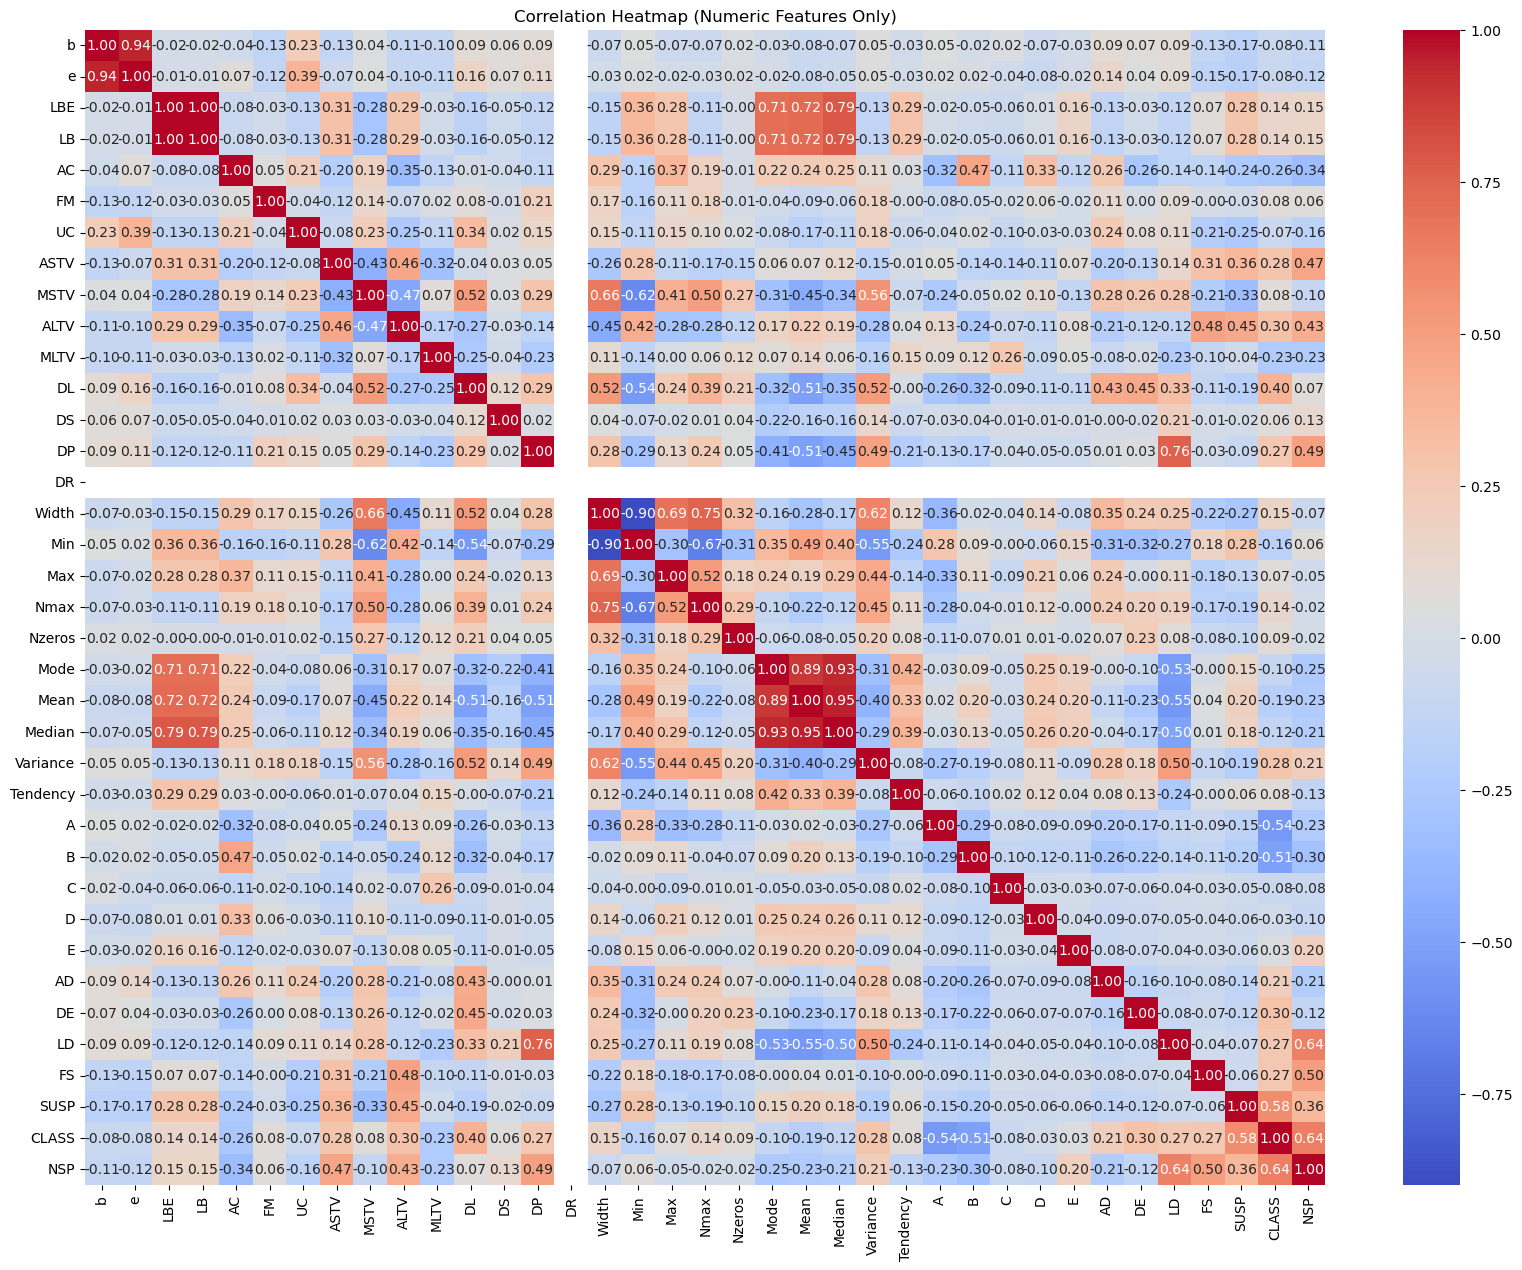

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is already loaded from 'Data' sheet and cleaned:

# Drop rows where 'NSP' is missing (just in case)
df = df.dropna(subset=['NSP'])

# Select only numeric columns (including 'NSP' temporarily)
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Make sure there are no columns with all NaNs
numeric_df = numeric_df.dropna(axis=1, how='all')

# Check if numeric_df is not empty
if numeric_df.shape[1] == 0:
    print("No numeric columns to plot.")
else:
    # Compute correlation matrix
    corr_matrix = numeric_df.corr()

    # Plot heatmap
    plt.figure(figsize=(20, 15))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
    plt.title("Correlation Heatmap (Numeric Features Only)")
    plt.show()


In [60]:
df = df.dropna(subset=['NSP'])

# Target variable
y = df['NSP']  # 1 = Normal, 2 = Suspect, 3 = Pathologic

# Features - drop NSP and keep only numeric columns
X = df.drop(columns=['NSP'])
X = X.select_dtypes(include=['float64', 'int64'])

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Split into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

Classification Report:
              precision    recall  f1-score   support

         1.0       0.98      1.00      0.99       332
         2.0       0.98      0.86      0.92        59
         3.0       1.00      1.00      1.00        35

    accuracy                           0.98       426
   macro avg       0.99      0.95      0.97       426
weighted avg       0.98      0.98      0.98       426



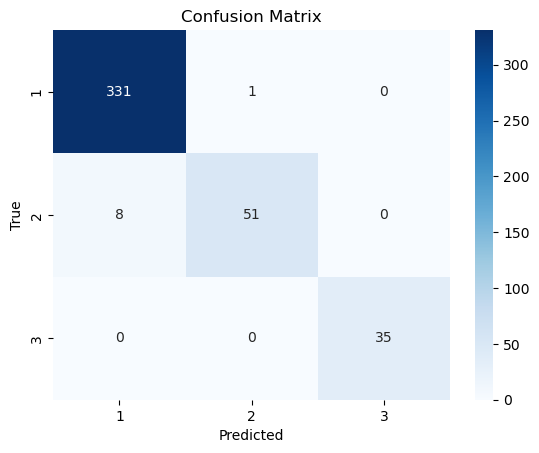

In [53]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[1,2,3], yticklabels=[1,2,3])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()